**1.	[10%] Proponga las tareas de aprendizaje, técnicas y algoritmos de machine learning que va a utilizar para lograr los objetivos que persigue la organización. Recuerde explicarles a los directivos de la organización que lo contrata, la razón por la cual su propuesta es apropiada.**


Se identificó una tarea de clasificación (supervisada) en la que se busca saber en un accidente de tránsito, la gravedad de este a partir de datos históricos de estos y factores de influencia.
La variable objeivo será la gravedad.
Para esto se hará uso del algoritmo KNN.

El algoritmo KNN: 
Sirve para clasificar buscando los puntos "parecidos"(por cercanía) aprendidos durante el entrenamiento.
•	Aprende a través de los registros que se tengan en la BD.
•	Cuando llegan nuevos datos usa el histórico de los que tenía para clasificar los nuevos.
•	Encuentra la distancia más cercana usando la distancia euclidiana (por defecto) o de Manhattan (#1 Manhattan, #2 euclidiana). 
•	Escoge al vecino más cercano y lo compara. Al ser cercanos sus comportamientos son parecidos así que se clasifican igual.
• Si k aumenta, la predicción hacia el nuevo dato también puede hacerlo. 




## 1. Carga de librerías necesarias para implementación

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', 30) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar
import numpy as np
np.random.seed(3301)

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots

# Para preparar los datos
from sklearn.preprocessing import LabelEncoder
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 
#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
from sklearn import tree

## 2. Cargar los datos

In [ ]:
# Se cargan los datos. 
df=pd.read_csv('datos_ accidentes.csv', sep=';', encoding = 'utf-8', index_col=False)

## 3. Perfilamiento y entendimiento de los datos 

In [ ]:
df.shape

(2809, 12)

In [ ]:
df.head()

,ID,Severidad_accidente,Numero_vehiculos,Numero_victimas,Dia_semana,Tipo_via,Limite_velocidad,Iluminacion,Clima,Condicion_via,Condiciones especiales,Tipo_area
0,201143N077061,Fatal,5,1,7,Autovia,70,Luz_dia,Bueno,Seca,No,Rural
1,200697LB70507,Fatal,1,1,2,Calzada,60,Luz_dia,Bueno,Seca,No,Rural
2,200897UA70101,Fatal,1,1,4,Calzada,30,Oscuridad con luces encendidas,Bueno,Humeda,No,Urbano
3,20114100D0277,Fatal,1,1,4,Calzada,40,Oscuridad sin iluminacion,Bueno,Seca,No,Rural
4,20141316C1381,Fatal,1,1,5,Calzada,40,Luz_dia,Bueno,Seca,No,Rural


In [ ]:
# Revisar las características de los datos: completitud y tipo de dato
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2809 entries, 0 to 2808
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      2809 non-null   object
 1   Severidad_accidente     2804 non-null   object
 2   Numero_vehiculos        2809 non-null   int64 
 3   Numero_victimas         2809 non-null   object
 4   Dia_semana              2809 non-null   int64 
 5   Tipo_via                2792 non-null   object
 6   Limite_velocidad        2809 non-null   int64 
 7   Iluminacion             2808 non-null   object
 8   Clima                   2794 non-null   object
 9   Condicion_via           2809 non-null   object
 10  Condiciones especiales  2809 non-null   object
 11  Tipo_area               2808 non-null   object
dtypes: int64(3), object(9)
memory usage: 263.5+ KB


In [ ]:
# Se observa que hay ausencias. Veamos cuantas, para todas las variables:
df.isnull().sum()

ID                         0
Severidad_accidente        5
Numero_vehiculos           0
Numero_victimas            0
Dia_semana                 0
Tipo_via                  17
Limite_velocidad           0
Iluminacion                1
Clima                     15
Condicion_via              0
Condiciones especiales     0
Tipo_area                  1
dtype: int64

In [ ]:
# Resumen de los estadisticos de las variables numéricas
df.describe()

,Numero_vehiculos,Dia_semana,Limite_velocidad
count,2809.000000,2809.000000,2809.000000
mean,1.798149,4.143111,44.401566
std,0.720713,1.972972,206.956835
min,1.000000,1.000000,-70.000000
25%,1.000000,2.000000,30.000000
50%,2.000000,4.000000,30.000000
75%,2.000000,6.000000,50.000000
max,8.000000,12.000000,7777.000000


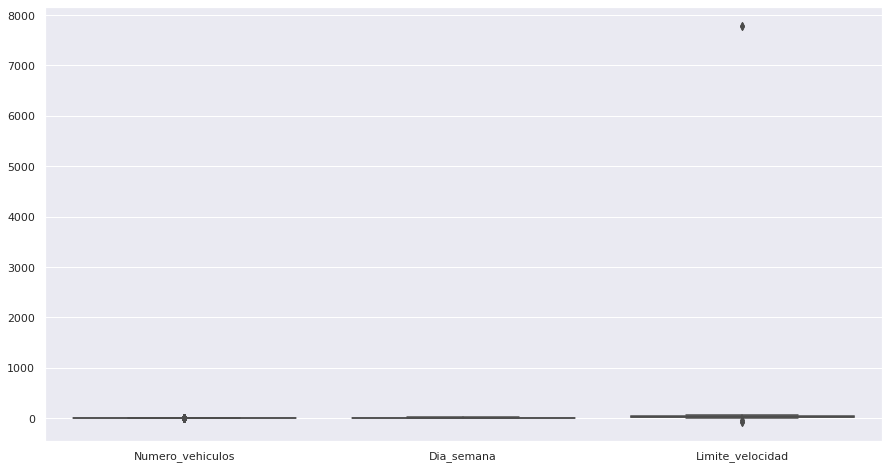

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(15,8))
ax = sns.boxplot(data=df, orient="v")

In [ ]:
# Explorar las variables que no son numéricas
name_cols_non_number = df.select_dtypes(include = ['object']).columns
name_cols_non_number

Index(['ID', 'Severidad_accidente', 'Numero_victimas', 'Tipo_via',
       'Iluminacion', 'Clima', 'Condicion_via', 'Condiciones especiales',
       'Tipo_area'],
      dtype='object')

In [ ]:
# Revisamos el contenido de las columnas no numéricas
df.Severidad_accidente.sample(10)

264     Fatal
1963     Leve
1444     Leve
2661     Leve
407     Serio
53      Fatal
2645     Leve
2192     Leve
1708     Leve
510     Serio
Name: Severidad_accidente, dtype: object

In [ ]:
#Revisar el contenido de las variables que no son numéricas
df[name_cols_non_number].describe()

,ID,Severidad_accidente,Numero_victimas,Tipo_via,Iluminacion,Clima,Condicion_via,Condiciones especiales,Tipo_area
count,2809,2804,2809,2792,2808,2794,2809,2809,2808
unique,2809,3,18,5,5,7,5,2,2
top,201143N077061,Leve,1,Calzada,Luz_dia,Bueno,Seca,No,Urbano
freq,1,1893,2106,2093,1993,2261,1906,2750,1881


## Revisaremos los valores que tiene cada columna

In [ ]:
# Lista de nombres de columnas
lista = df.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=df.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

ID
200501BS70357    1
200501BS70480    1
200501BS70779    1
200501CW10131    1
200501CW11738    1
                ..
201497LA01105    1
201497LB01203    1
201497LB02206    1
201497UD04412    1
201497UD05105    1
Length: 2809, dtype: int64
--------------------
Severidad_accidente
Fatal     294
Leve     1893
Serio     617
dtype: int64
--------------------
Numero_vehiculos
1     952
2    1561
3     228
4      52
5      13
6       2
8       1
dtype: int64
--------------------
Numero_victimas
1             2106
11               1
13               1
17               1
2              491
2.3              1
3              121
3.45             1
4               50
44444444         1
5               23
5.78             1
6                5
6.78             1
7                2
70.000.000       1
8                1
9                1
dtype: int64
--------------------
Dia_semana
1     328
2     391
3     404
4     404
5     403
6     489
7     381
8       5
10      2
12      2
dtype: int64
-------

###**Análisis** 
**2.	[30%] Describa y haga un análisis del resultado del perfilamiento de los datos suministrados (anexos a este enunciado). **
1. Se observa que todas las variables no númericas podrían  ser convertidas a numéricas.
2. Hay variables con varios valores nulos, así como errores de formato, o fuera de rango como:
  
*   Numero_victimas, tiene valores decimales, y valores muy grandes que no tienen sentido para el negocio. 

*   Dia_semana presenta valores mayores a 7 que no tienen sentido pues se trata del día de la semana.

*   Limite_velocidad, tienen valores negativos que no tienen sentido pues el límite de velocidad no puede ser menos a 0.

*   Iluminacion presenta un tipo de dato fuera del establecido por el diccionario "0".

3. ID es prescindible para la tarea.


Estos análisis nos ayudan a entender el conjunto de datos y a identificar posibles tareas de limpieza que debo realizar antes de generar un modelo.

## 4. Limpieza de datos


In [ ]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
datos_l = df

In [ ]:
# Eliminación registros con ausencias
datos_l = datos_l.dropna()
# Eliminación de registros duplicados.
datos_l = datos_l.drop_duplicates()
#Se elimina la variable "ID"
datos_l = datos_l.drop(['ID'],axis=1)
datos_l.shape

(2770, 12)

In [ ]:
#Convertir los valores decimales en Numero_victimas a enteros
datos_l['Numero_victimas']=pd.to_numeric(datos_l.Numero_victimas, errors = 'coerce')
datos_l = datos_l.dropna()
datos_l['Numero_victimas']=datos_l['Numero_victimas'].round(0).astype(int)
datos_ver=datos_l.groupby(["Numero_victimas"]).size()
datos_ver

Numero_victimas
1           2076
2            487
3            119
4             50
5             23
6              6
7              3
8              1
9              1
11             1
13             1
44444444       1
dtype: int64

In [ ]:
#Eliminaremos las filas que contienen datos fuera de rango en:

#Numero_victimas,  valores  mayores a 15
datos_l = datos_l.drop(datos_l[datos_l['Numero_victimas']>15].index)

#Dia_semana  valores  mayores a 7.
datos_l = datos_l.drop(datos_l[datos_l['Dia_semana']>7].index)

#Limite_velocidad valores mayores a 150 y menores o iguales a 0
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']>150].index)
datos_l = datos_l.drop(datos_l[datos_l['Limite_velocidad']<=0].index)

#Iluminacion valor no válido "0".
datos_l = datos_l.drop(datos_l[datos_l['Iluminacion']=="0"].index)
datos_l.shape

(2728, 11)

In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Severidad_accidente
Fatal     285
Leve     1838
Serio     605
dtype: int64
--------------------
Numero_vehiculos
1     927
2    1515
3     219
4      51
5      13
6       2
8       1
dtype: int64
--------------------
Numero_victimas
1     2042
2      483
3      119
4       49
5       22
6        6
7        3
8        1
9        1
11       1
13       1
dtype: int64
--------------------
Dia_semana
1    319
2    377
3    394
4    392
5    395
6    477
7    374
dtype: int64
--------------------
Tipo_via
Autovia              441
Calzada             2049
Carretera acceso      26
Rotonda              155
Un solo sentido       57
dtype: int64
--------------------
Limite_velocidad
20      22
30    1759
40     229
50      93
60     427
70     198
dtype: int64
--------------------
Iluminacion
Luz_dia                           1948
Oscuridad con luces apagadas        13
Oscuridad con luces encendidas     605
Oscuridad sin iluminacion          162
dtype: int64
--------------------
Clima
Bueno      

**Explique las tareas de transformación que hizo e justifíquelas.**
Se crearán nuevas columnas para convertir las columnas 'Tipo_via', 'Iluminacion', 'Clima', 'Condicion_via', 'Condiciones especiales',  'Tipo_area'  y 'Severidad_accidente ' de tipo objetc en categóricas.

1. Tipo_via
*   Autovía=0
*   Calzada=1
*   Rotonda=2
*   Carretera acceso=3
*   Un solo sentido=4


2. Iluminacion
*   Luz_dia=0
*   Oscuridad con luces apagadas=1
*   Oscuridad con luces encendidas=2
*   Oscuridad sin iluminacion=3


3. Clima
*   Bueno=0
*   LLuvioso y ventoso =1
*   Lluvioso=2
*   Niebla=3
*   Nieve=4
*   Nieve y ventoso  =5
*   Ventoso=6

4. Condicion_via
*   Con nieve=0
*   Hielo=1
*   Rotonda=2
*   Inundada=3
*   Seca=4

5. Condiciones especiales
*  No=0
*  Si=1

6. Tipo_area
*  Rural=0
*  Urbano=1

7. Severidad_accidente             

*  Fatal=0
*  Leve=1
*  Serio=2




In [ ]:
#Crear nuevas columnas para convertir las columnas 'Tipo_via', 'Iluminacion', 'Clima', 'Condicion_via', 'Condiciones especiales' , 'Tipo_area' y 'Severidad_accidente' de tipo objetc en categóricas

#Tipo_via
def numeric_Tipo_via(row):
    if row['Tipo_via'] =="Autovia" :
      return 0
    elif row['Tipo_via'] =="Calzada" :
      return 1
    elif row['Tipo_via'] =="Rotonda" :
      return 2
    elif row['Tipo_via'] =="Carretera acceso" :
      return 3
    elif row['Tipo_via'] =="Un solo sentido" :
      return 4
datos_l['Tipo_via_numeric']=datos_l.apply (lambda row: numeric_Tipo_via(row), axis=1)    

#Iluminacion
def numeric_Iluminacion(row):
    if row['Iluminacion'] =="Luz_dia" :
      return 0
    elif row['Iluminacion'] =="Oscuridad con luces apagadas" :
      return 1
    elif row['Iluminacion'] =="Oscuridad con luces encendidas" :
      return 2
    elif row['Iluminacion'] =="Oscuridad sin iluminacion" :
      return 3

datos_l['Iluminacion_numeric']=datos_l.apply (lambda row: numeric_Iluminacion(row), axis=1)    

#Clima
def numeric_Clima(row):
    if row['Clima'] =="Bueno" :
      return 0
    elif row['Clima'] =="LLuvioso y ventoso" :
      return 1
    elif row['Clima'] =="Lluvioso" :
      return 2
    elif row['Clima'] =="Niebla" :
      return 3
    elif row['Clima'] =="Nieve" :
      return 4
    elif row['Clima'] =="Nieve y ventoso" :
      return 5
    elif row['Clima'] =="Ventoso" :
      return 6

datos_l['Clima_numeric']=datos_l.apply (lambda row: numeric_Clima(row), axis=1) 


#Condicion_via
def numeric_Condicion_via(row):
    if row['Condicion_via'] =="Con nieve" :
      return 0
    elif row['Condicion_via'] =="Hielo" :
      return 1
    elif row['Condicion_via'] =="Humeda" :
      return 2
    elif row['Condicion_via'] =="Inundada" :
      return 3
    elif row['Condicion_via'] =="Seca" :
      return 4


datos_l['Condicion_via_numeric']=datos_l.apply (lambda row: numeric_Condicion_via(row), axis=1)    


#Condiciones especiales
def numeric_Condiciones_especiales(row):
    if row['Condiciones especiales'] =="No" :
      return 0
    return 1

datos_l['Condiciones_especiales_numeric']=datos_l.apply (lambda row: numeric_Condiciones_especiales(row), axis=1)    


#Tipo_area
def numeric_Tipo_area(row):
    if row['Tipo_area'] =="Rural" :
      return 0
    return 1

datos_l['Tipo_area_numeric']=datos_l.apply (lambda row: numeric_Tipo_area(row), axis=1)    

#Severidad_accidente
def numeric_Severidad_accidente(row):
    if row['Severidad_accidente'] =="Fatal" :
      return 0
    elif row['Severidad_accidente'] =="Leve" :
      return 1
    elif row['Severidad_accidente'] =="Serio" :
      return 2

datos_l['Severidad_accidente_numeric']=datos_l.apply (lambda row: numeric_Severidad_accidente(row), axis=1)  

In [ ]:
#Verificar que los cambios se aplicaron correctamente
# Lista de nombres de columnas
lista = datos_l.columns.tolist()

#Revisar diferentes valores que hay en las columnas para hacer limpieza
for i in lista:
  datos_ver=datos_l.groupby([i]).size()
  print(datos_ver)
  print('-'*20)

Severidad_accidente
Fatal     285
Leve     1838
Serio     605
dtype: int64
--------------------
Numero_vehiculos
1     927
2    1515
3     219
4      51
5      13
6       2
8       1
dtype: int64
--------------------
Numero_victimas
1     2042
2      483
3      119
4       49
5       22
6        6
7        3
8        1
9        1
11       1
13       1
dtype: int64
--------------------
Dia_semana
1    319
2    377
3    394
4    392
5    395
6    477
7    374
dtype: int64
--------------------
Tipo_via
Autovia              441
Calzada             2049
Carretera acceso      26
Rotonda              155
Un solo sentido       57
dtype: int64
--------------------
Limite_velocidad
20      22
30    1759
40     229
50      93
60     427
70     198
dtype: int64
--------------------
Iluminacion
Luz_dia                           1948
Oscuridad con luces apagadas        13
Oscuridad con luces encendidas     605
Oscuridad sin iluminacion          162
dtype: int64
--------------------
Clima
Bueno      

In [ ]:
#Acá se eliminan  las variables 'Tipo_via', 'Iluminacion', 'Clima', 'Condicion_via', 'Condiciones especiales' y 'Tipo_area' que ya no se necesitan
datos_t = datos_l.drop(['Tipo_via', 'Iluminacion', 'Clima', 'Condicion_via', 'Condiciones especiales','Tipo_area', 'Severidad_accidente'],axis=1)
datos_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2728 entries, 0 to 2808
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Numero_vehiculos                2728 non-null   int64
 1   Numero_victimas                 2728 non-null   int64
 2   Dia_semana                      2728 non-null   int64
 3   Limite_velocidad                2728 non-null   int64
 4   Tipo_via_numeric                2728 non-null   int64
 5   Iluminacion_numeric             2728 non-null   int64
 6   Clima_numeric                   2728 non-null   int64
 7   Condicion_via_numeric           2728 non-null   int64
 8   Condiciones_especiales_numeric  2728 non-null   int64
 9   Tipo_area_numeric               2728 non-null   int64
 10  Severidad_accidente_numeric     2728 non-null   int64
dtypes: int64(11)
memory usage: 255.8 KB


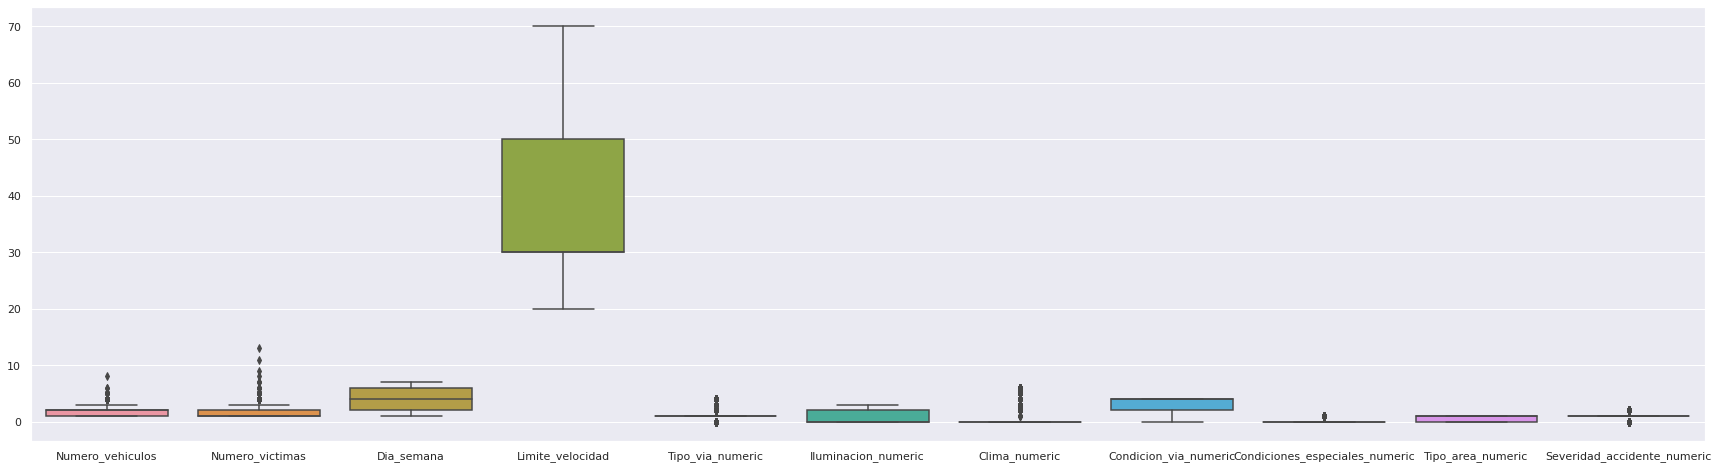

In [ ]:
#Visualización de todas las variables numéricas
fig=plt.figure(figsize=(30,8))
ax = sns.boxplot(data=datos_t, orient="v")

In [ ]:
datos_t.shape

(2728, 11)

**Muestre un subconjunto de los datos luego del pre-procesamiento, para ilustrar cómo quedan los datos que utilizará para aplicar los algoritmos de aprendizaje.**

In [ ]:
datos_t.sample(10)

,Numero_vehiculos,Numero_victimas,Dia_semana,Limite_velocidad,Tipo_via_numeric,Iluminacion_numeric,Clima_numeric,Condicion_via_numeric,Condiciones_especiales_numeric,Tipo_area_numeric,Severidad_accidente_numeric
490,1,1,5,40,2,0,5,2,0,0,2
1582,1,1,6,60,1,0,2,2,0,0,1
1620,3,1,6,70,0,2,2,2,0,0,1
2138,1,1,3,40,1,0,2,2,0,0,1
26,3,1,6,60,1,0,0,4,0,0,0
152,2,1,6,30,1,0,3,4,0,1,0
2678,2,1,6,30,4,0,0,4,0,1,1
757,2,1,2,30,1,2,0,4,0,1,2
1970,2,2,1,30,1,2,0,2,0,1,1
11,2,1,6,30,1,0,0,4,0,1,0


##5. KNN


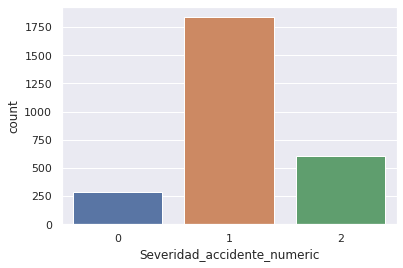

In [ ]:
# vizualizar las proporciones con un diagrama de barras.
ax = sns.countplot(x='Severidad_accidente_numeric', data=datos_t)

Los datos se ven muy desbalanceados, por esta razón será necesario aplicar un algoritmo como SMOTE que permita tener una mejor distribución de estos.

In [ ]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = datos_t.dtypes[(datos_t.dtypes == np.int64) | (datos_t.dtypes == np.float64)].index 
number_cols = datos_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Numero_vehiculos', 'Numero_victimas', 'Dia_semana', 'Limite_velocidad',
       'Tipo_via_numeric', 'Iluminacion_numeric', 'Clima_numeric',
       'Condicion_via_numeric', 'Condiciones_especiales_numeric',
       'Tipo_area_numeric', 'Severidad_accidente_numeric'],
      dtype='object')

In [ ]:
datos_m = datos_t[number_cols]
# Revisión del total de registros
datos_m.shape

(2728, 11)

###5.1 KNN sin SMOTE, ni hiperparámetros

In [ ]:
# Se selecciona la variable objetivo, en este caso "Severidad_accidente_numeric".
Y = datos_m['Severidad_accidente_numeric']
# Del conjunto de datos se elimina la variable "Severidad_accidente_numeric"
X = datos_m.drop(['Severidad_accidente_numeric'], axis=1)

# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Utilicemos un número de vecinos = 3 
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn = modelo_knn.fit(X_train, Y_train)

y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.70
Exactitud sobre test: 0.55


In [ ]:
pd.value_counts(Y)

1    1838
2     605
0     285
Name: Severidad_accidente_numeric, dtype: int64

In [ ]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.18      0.29      0.22        51
           1       0.69      0.73      0.71       368
           2       0.25      0.14      0.18       127

    accuracy                           0.55       546
   macro avg       0.37      0.39      0.37       546
weighted avg       0.54      0.55      0.54       546



Fatal=0
Leve=1
Serio=2

VP FN

FP VN

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


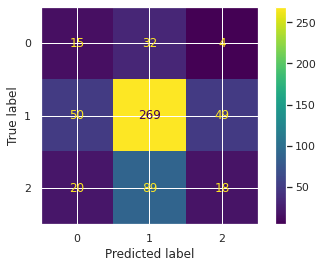

In [ ]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()

###5.2 KNN con SMOTE
Se puede notar que lo resultados obtenidos no son los mejores al estar desbalanceados.  

Entonces SMOTE para balancear los datos y normalizar para  obtener mejores resultados.

SMOTE: Hacer oversampling (aumenta los registros de la clase minoritaria). Coge una fila al azar de la clase minoritaria, miro los más cercanos y hago por ejemplo, un promedio de los valores de ellos. Con eso se garantiza que se crea un nuevo registro que tiene una distribución similar a la de los datos inicialmente escogidos. 

In [ ]:
# Probemos normalizando los datos
X_n = X.copy()
X_n=(X_n-X_n.min())/(X_n.max()-X_n.min())

In [ ]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=0)

X_sm, y_sm = sm.fit_resample(X_n, Y)

print(f'''Shape of X before SMOTE: {X_n.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (2728, 10)
Shape of X after SMOTE: (5514, 10)

Balance of positive and negative classes (%):


0    33.333333
2    33.333333
1    33.333333
Name: Severidad_accidente_numeric, dtype: float64

In [ ]:
#ver la cantidad de datos en cada categoría después de SMOTE
pd.value_counts(y_sm)

0    1838
2    1838
1    1838
Name: Severidad_accidente_numeric, dtype: int64

In [ ]:
# Dividir los datos en entrenamiento y test con SMOTE
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=0)

# Utilicemos un número de vecinos = 3
modelo_knn = KNeighborsClassifier(n_neighbors=3)
modelo_knn = modelo_knn.fit(X_train, Y_train)

y_pred_train = modelo_knn.predict(X_train)
y_pred_test = modelo_knn.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.76
Exactitud sobre test: 0.65


In [ ]:
# Mostrar reporte de clasificación sobre test SMOTE
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76       367
           1       0.62      0.54      0.58       358
           2       0.62      0.56      0.59       378

    accuracy                           0.65      1103
   macro avg       0.64      0.65      0.64      1103
weighted avg       0.64      0.65      0.64      1103



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


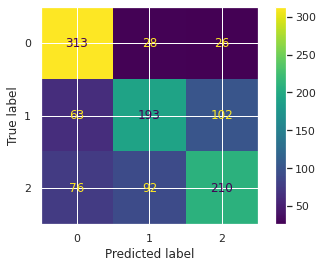

In [ ]:
# visualizar la matriz de confusión CON SMOTE
plot_confusion_matrix(modelo_knn, X_test, Y_test)  
plt.show()


###5.3 KNN con SMOTE y con búsqueda de hiperparámetros
Los resultados mejoraron pero aún pueden hacerlo más, por eso ahora se buscan los mejores parámetros (número de vecinos y función: #1 Manhattan, #2 ecuclidiana) con el mejor cross-validation score.

In [ ]:
# Primero definamos el espacio de búsqueda
n_vecinos =  list(range(1,11))
# Fijemos el número de particiones. Utilizaremos K = 10.
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)

In [ ]:
param_grid = {'n_neighbors': n_vecinos, 'p': [1, 2]} #1 Manhattan, 2 euclidiana

**3.	[15%] Muestre el resultado que arroja la ejecución del algoritmo o algoritmos de machine learning propuestos, con los datos suministrados para la consultoría. Explique cómo el resultado obtenido responde a los objetivos de la organización que lo contrató.**

In [ ]:
clasificadorKNN = KNeighborsClassifier()
modelo_Knn = GridSearchCV(clasificadorKNN, param_grid, cv=particiones)
modelo_Knn.fit(X_train,Y_train) 
print("Mejor parámetro: {}".format(modelo_Knn.best_params_)) 
print("Mejor cross-validation score: {:.2f}".format(modelo_Knn.best_score_))

Mejor parámetro: {'n_neighbors': 1, 'p': 2}
Mejor cross-validation score: 0.67


In [ ]:
# Obtener el mejor modelo.
modelo_final = modelo_Knn.best_estimator_
# Probemos ahora este modelo sobre test.
y_pred_train = modelo_final.predict(X_train)
y_pred_test = modelo_final.predict(X_test)
print('Exactitud sobre entrenamiento: %.2f' % accuracy_score(Y_train, y_pred_train))
print('Exactitud sobre test: %.2f' % accuracy_score(Y_test, y_pred_test))

Exactitud sobre entrenamiento: 0.83
Exactitud sobre test: 0.65


In [ ]:
# Mostrar reporte de clasificación sobre test
print(classification_report(Y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       367
           1       0.60      0.53      0.57       358
           2       0.60      0.60      0.60       378

    accuracy                           0.65      1103
   macro avg       0.65      0.65      0.65      1103
weighted avg       0.65      0.65      0.65      1103



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


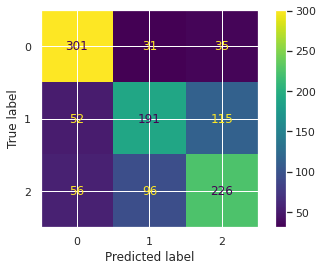

In [ ]:
# Se puede visualizar la matriz de confusión CON SMOTE con el mejor modelo y parámetros
plot_confusion_matrix(modelo_Knn, X_test, Y_test)  
plt.show()

###6. Analizar y concluir

*   Se obtuvo que el mejor número de vecinos es 1, y la mejor función es la #2= Euclidiana. 
*   se puede notar una leve mejora  en los resultados de las métricas de Precisión, recall y accuracy en general, pues se obtienen menos falsos positivos y negativos. 

-Precisión: Esto quiere decir que un 74% de los casos realmente serán fatales y  se equivocará aproximadamente un 26% de las veces en clasificarlos. 

-Recall: Es decir, el modelo es capaz de identificar un 82% de los accidentes que serían fatales. Además un 53% de aquellos que serían leves, y un 60% de aquellos que serían serios.

-Accuracy: el modelo está acertando un 78% de las veces con su predicción, y es más confiable pues los datos están balanceados (hay igual cantidad de datos para 0 , 1 y 2).
